Віршило Михайло Лаб-3

Task 1 - Побудувати лінійний графік річної аномалії температури за весь період.

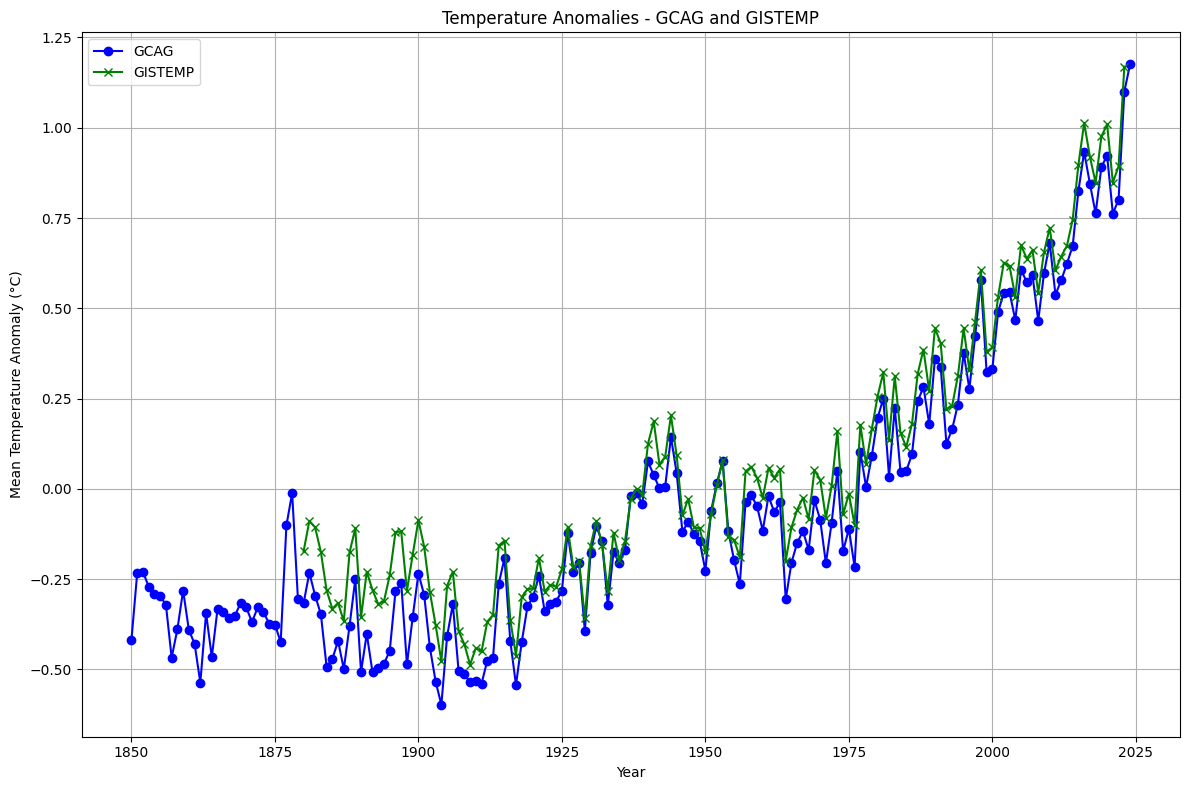

In [69]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("flat-ui__data-Fri Oct 25 2024.csv")

gcag_data = df[df['Source'] == 'gcag']
gistemp_data = df[df['Source'] == 'GISTEMP']

plt.figure(figsize=(12, 8))
plt.plot(gcag_data['Year'], gcag_data['Mean'], marker='o', linestyle='-', color='blue', label='GCAG')
plt.plot(gistemp_data['Year'], gistemp_data['Mean'], marker='x', linestyle='-', color='green', label='GISTEMP')
plt.title('Temperature Anomalies - GCAG and GISTEMP')
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Task 2 - Візуалізувати зміну річної аномалії температури в окремих десятиліттях, використовуючи стовпчасту діаграму. (обчислити середні значення річних аномалій для кожного десятиліття (наприклад, 1850-1859, 1860-1869 і т.д.) і відобразити ці середні значення у вигляді стовпчастої діаграми.)


C:\Users\misha\AppData\Local\Temp\ipykernel_12480\2909739875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcag_data['Decade'] = (gcag_data['Year'] // 10) * 10
C:\Users\misha\AppData\Local\Temp\ipykernel_12480\2909739875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gistemp_data['Decade'] = (gistemp_data['Year'] // 10) * 10


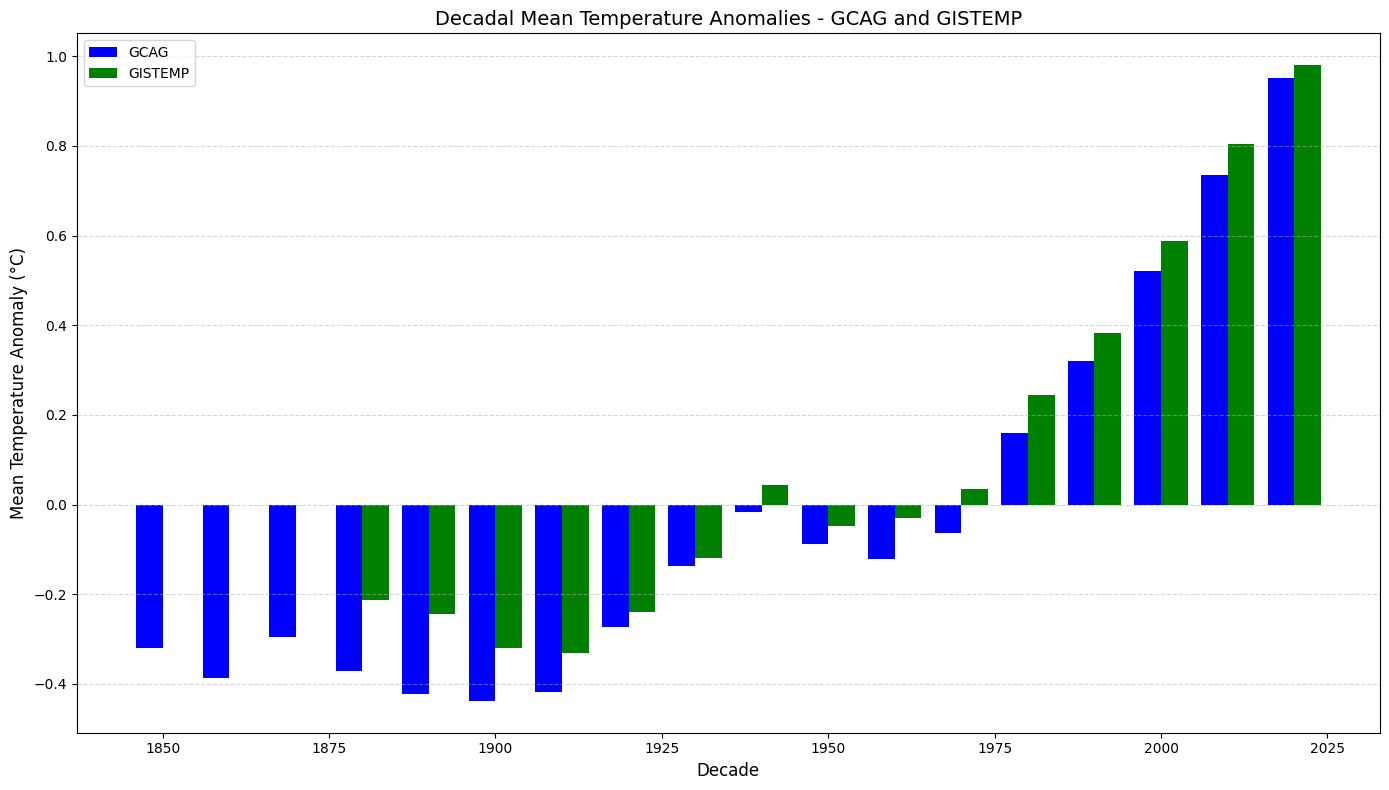

In [70]:
gcag_data['Decade'] = (gcag_data['Year'] // 10) * 10
gistemp_data['Decade'] = (gistemp_data['Year'] // 10) * 10

gcag_decade_mean = gcag_data.groupby('Decade')['Mean'].mean().reset_index()
gistemp_decade_mean = gistemp_data.groupby('Decade')['Mean'].mean().reset_index()

plt.figure(figsize=(14, 8))
plt.bar(gcag_decade_mean['Decade'] - 2, gcag_decade_mean['Mean'], width=4, color='blue', label='GCAG')
plt.bar(gistemp_decade_mean['Decade'] + 2, gistemp_decade_mean['Mean'], width=4, color='green', label='GISTEMP')
plt.title('Decadal Mean Temperature Anomalies - GCAG and GISTEMP', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Mean Temperature Anomaly (°C)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Task 3 - Використати функцію субплотів для відображення річних та місячних аномалій одночасно.

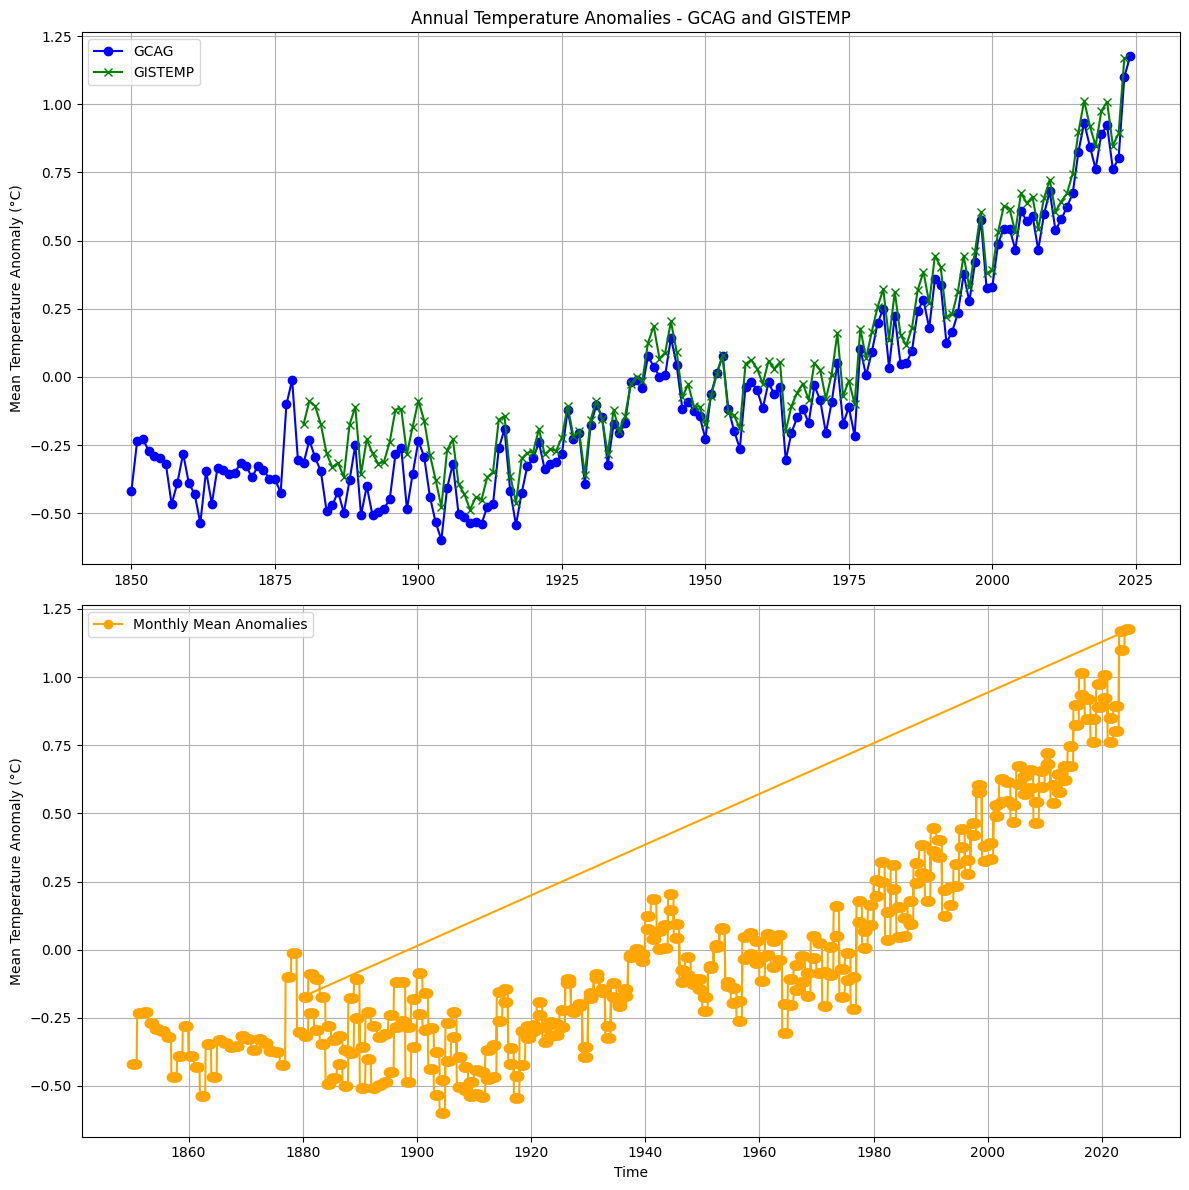

In [71]:
import numpy as np
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)  
plt.plot(gcag_data['Year'], gcag_data['Mean'], marker='o', linestyle='-', color='blue', label='GCAG')
plt.plot(gistemp_data['Year'], gistemp_data['Mean'], marker='x', linestyle='-', color='green', label='GISTEMP')
plt.title('Annual Temperature Anomalies - GCAG and GISTEMP')
plt.ylabel('Mean Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()

monthly_data = pd.DataFrame({
    'Year': np.repeat(df['Year'].values, 12),  
    'Month': np.tile(np.arange(1, 13), len(df)), 
    'Mean': np.repeat(df['Mean'].values, 12) 
})

plt.subplot(2, 1, 2)
plt.plot(
    pd.to_datetime(monthly_data[['Year', 'Month']].assign(Day=1)), monthly_data['Mean'], 
    marker='o',  color='orange', label='Monthly Mean Anomalies'
)
plt.xlabel('Time')
plt.ylabel('Mean Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

Task 4 - Зробити завдання 3 з точковими графіками. Кастомізувати радіуси маркерів, кольори, прозорість, розмір полотна. Вивести графіки один під одним.


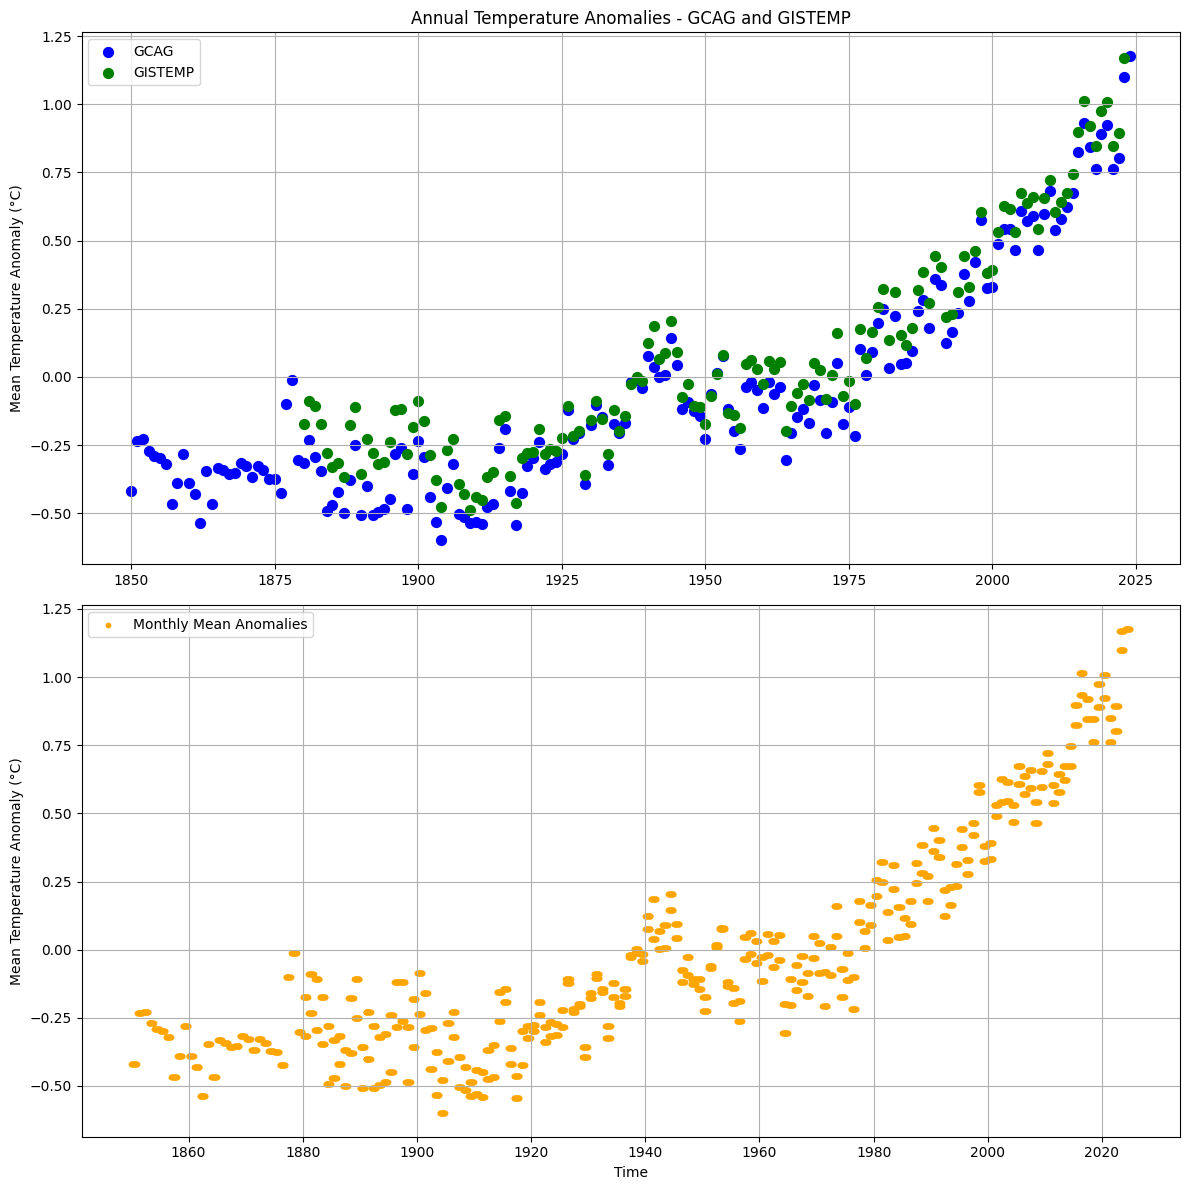

In [72]:
# Set the figure size
plt.figure(figsize=(12, 12))

# First subplot for annual data
plt.subplot(2, 1, 1)
plt.scatter(gcag_data['Year'], gcag_data['Mean'], color='blue', label='GCAG', s=50)  # Scatter plot for GCAG
plt.scatter(gistemp_data['Year'], gistemp_data['Mean'], color='green', label='GISTEMP', s=50)  # Scatter plot for GISTEMP
plt.title('Annual Temperature Anomalies - GCAG and GISTEMP')
plt.ylabel('Mean Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()

# Second subplot for monthly data
monthly_data = pd.DataFrame({
    'Year': np.repeat(df['Year'].values, 12),  
    'Month': np.tile(np.arange(1, 13), len(df)), 
    'Mean': np.repeat(df['Mean'].values, 12) 
})

plt.subplot(2, 1, 2)
plt.scatter(
    pd.to_datetime(monthly_data[['Year', 'Month']].assign(Day=1)), monthly_data['Mean'], 
    color='orange', label='Monthly Mean Anomalies', s=10
)
plt.xlabel('Time')
plt.ylabel('Mean Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Task 5 - Візуалізувати річні аномалії температури з використанням різних кольорів для позначення аномалій вище і нижче середнього значення. (розділити річні аномалії на дві категорії (вище і нижче середнього) і використати різні кольори для графіка, для цього ввести додаткову колонку з двома значеннями: кольорами)


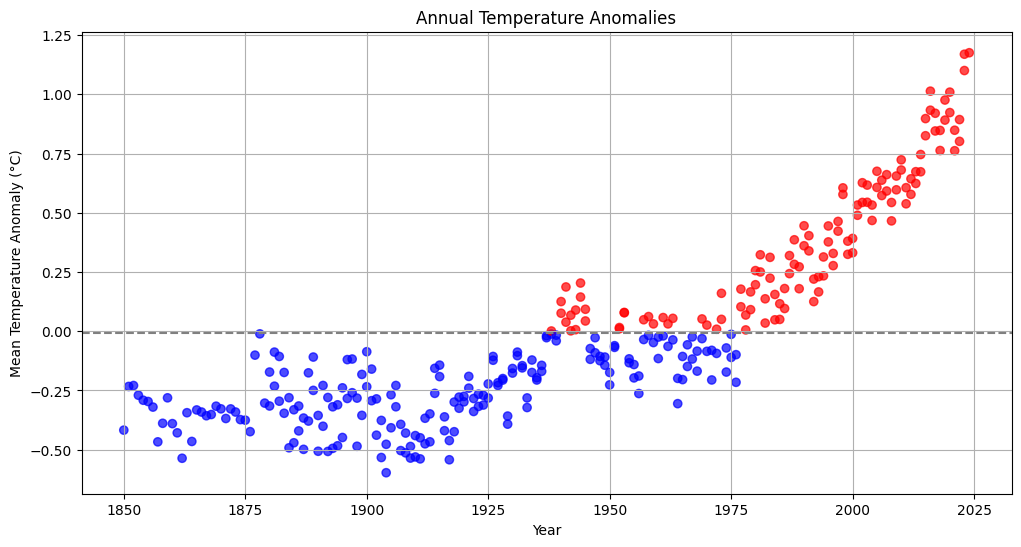

In [73]:

overall_mean = df['Mean'].mean()

df['Color'] = df['Mean'].apply(lambda x: 'red' if x > overall_mean else 'blue')
plt.figure(figsize=(12, 6))

plt.scatter(df['Year'], df['Mean'], c=df['Color'], alpha=0.7, label='Temperature Anomaly')
plt.axhline(y=overall_mean, color='gray', linestyle='--', label=f'Overall Mean ({overall_mean}°C)')
plt.title('Annual Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly (°C)')
plt.grid(True)

plt.show()